<a href="https://colab.research.google.com/github/ritusingla/deep-image-prior/blob/master/Copy_of_flash_no_flash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for **"Flash/No Flash"** figure. 

In [11]:
"""
*Uncomment if running on colab* 
Set Runtime -> Change runtime type -> Under Hardware Accelerator select GPU in Google Colab 
"""
!git clone https://github.com/DmitryUlyanov/deep-image-prior
!mv deep-image-prior/* ./

fatal: destination path 'deep-image-prior' already exists and is not an empty directory.
mv: cannot stat 'deep-image-prior/*': No such file or directory


# Import libs

In [0]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import numpy as np
from models import *

import torch
import torch.optim

from utils.denoising_utils import *
from utils.sr_utils import load_LR_HR_imgs_sr
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

imsize =-1
PLOT = True

# Load image

HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)
HR and LR resolutions: (768, 704), (768, 704)


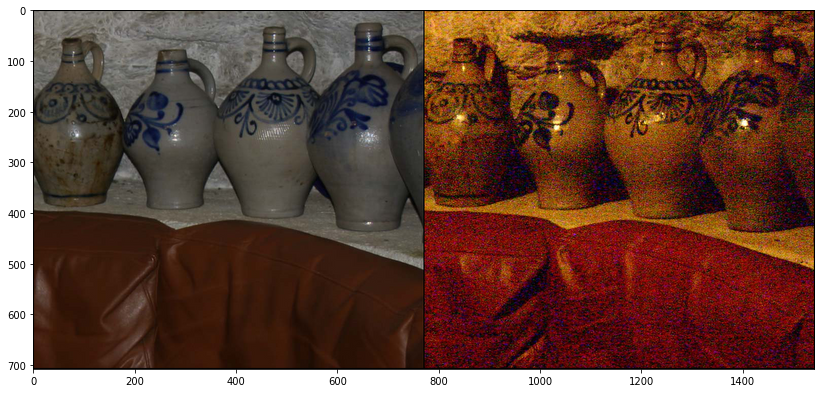

In [13]:
imgs = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')
img_flash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_00_flash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_flash_np = pil_to_np(img_flash)

img_noflash = load_LR_HR_imgs_sr('data/flash_no_flash/cave01_01_noflash.jpg', -1, 1, enforse_div32='CROP')['HR_pil']
img_noflash_np = pil_to_np(img_noflash)

g = plot_image_grid([img_flash_np, img_noflash_np],3,12)

# Setup

In [0]:
pad = 'reflection'
OPT_OVER = 'net'

num_iter = 601
LR = 0.1 
OPTIMIZER = 'adam'
reg_noise_std = 0.0
show_every = 50
figsize = 6

# We will use flash image as input
input_depth = 3
net_input =np_to_torch(img_flash_np).type(dtype)

In [0]:
net = skip(input_depth, 3, num_channels_down = [128, 128, 128, 128, 128], 
                        num_channels_up   = [128, 128, 128, 128, 128],
                        num_channels_skip = [4, 4, 4, 4, 4], 
                        upsample_mode=['nearest', 'nearest', 'bilinear', 'bilinear', 'bilinear'], 
                        need_sigmoid=True, need_bias=True, pad=pad).type(dtype)

mse = torch.nn.MSELoss().type(dtype)

img_flash_var = np_to_torch(img_flash_np).type(dtype)
img_noflash_var = np_to_torch(img_noflash_np).type(dtype)

# Optimize

Starting optimization with ADAM


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


[0.14770813]


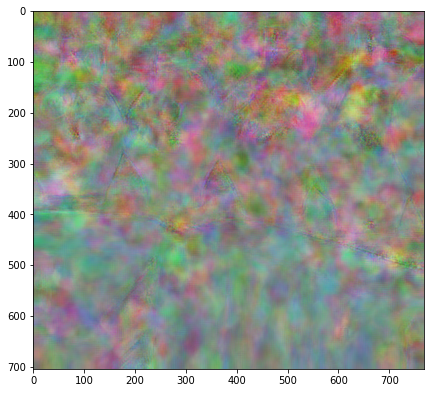

[0.14770813 0.06714703]
[0.14770813 0.06714703 0.06673932]
[0.14770813 0.06714703 0.06673932 0.06641541]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149 ]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716 ]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.

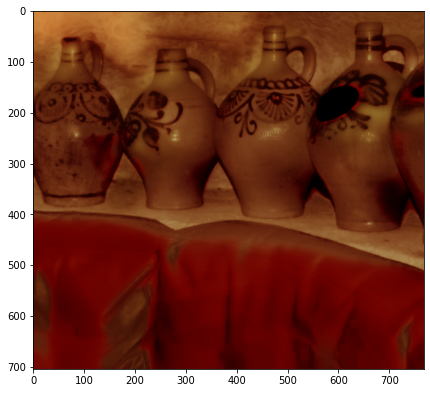

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715]
[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01

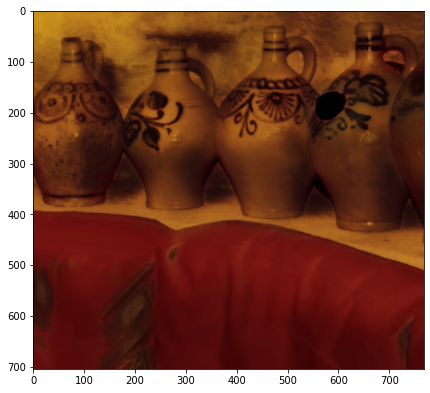

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

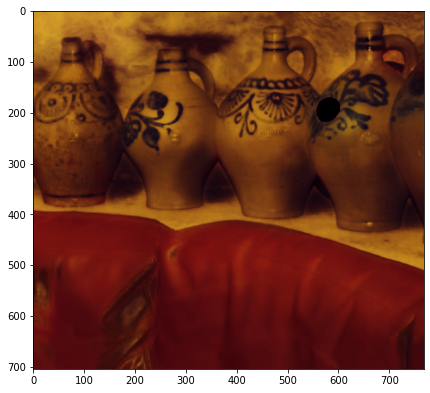

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

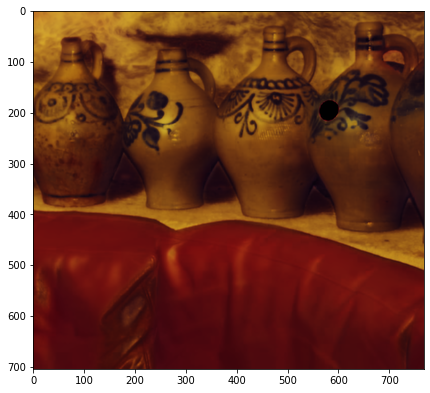

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

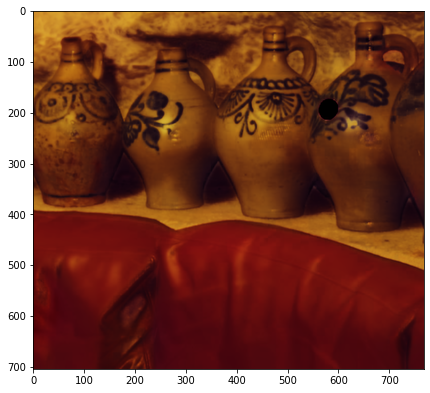

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

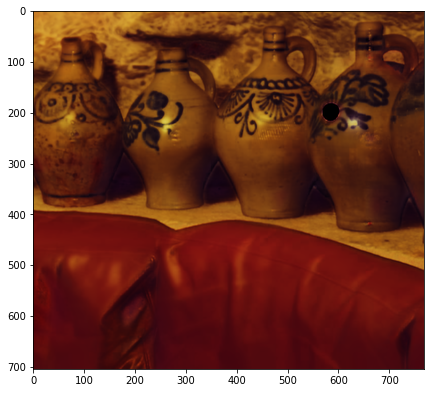

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

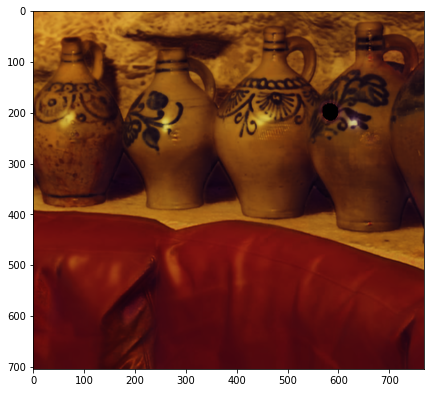

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

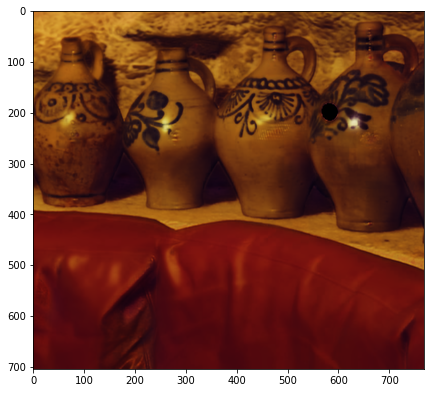

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

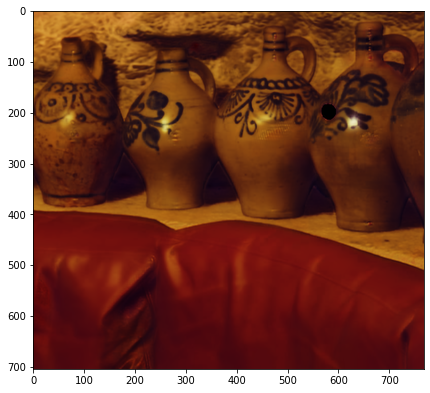

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

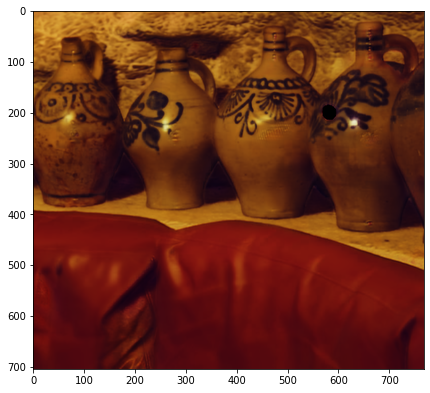

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

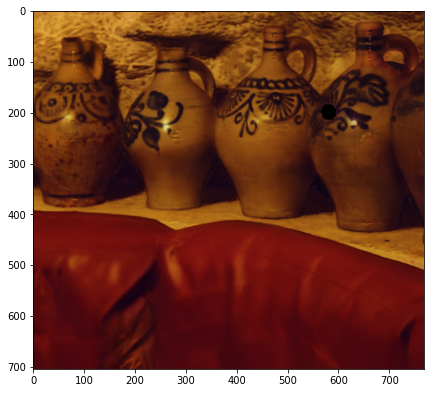

[0.14770813 0.06714703 0.06673932 0.06641541 0.0661149  0.05262821
 0.04472206 0.04183447 0.0398716  0.03795034 0.03460294 0.03104795
 0.03077849 0.03020331 0.02937377 0.02818346 0.0267771  0.02651118
 0.02591357 0.02491359 0.02457778 0.02384588 0.02425128 0.02340385
 0.02355239 0.02274599 0.02256281 0.02417246 0.0233237  0.02258433
 0.02211159 0.02202691 0.02134124 0.02115754 0.02021854 0.01963338
 0.01894904 0.01806546 0.017275   0.01662266 0.01606718 0.01567171
 0.01528995 0.01486371 0.01450426 0.01425319 0.01398102 0.01378738
 0.01360756 0.01345002 0.01323986 0.01304715 0.01282968 0.0126326
 0.01248925 0.01227797 0.01216587 0.01204438 0.01225976 0.0120421
 0.01192387 0.01173431 0.01152329 0.01157133 0.01204071 0.01271589
 0.01369227 0.0112223  0.01290977 0.01467049 0.01143666 0.01503055
 0.01252972 0.0131862  0.01199782 0.01206786 0.01220637 0.01134267
 0.01176798 0.01101183 0.01116453 0.01098233 0.01063035 0.01071933
 0.0103979  0.01040971 0.01038019 0.00999383 0.01006501 0.009950

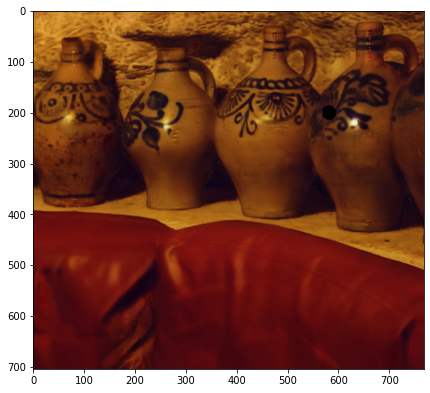

In [16]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()

l=[]
i = 0
def closure():
    
    global i, net_input,l
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
    
    out = net(net_input)
   
    total_loss = mse(out, img_noflash_var)
    l=np.append(l,total_loss.item())
    print(l)
    total_loss.backward()
        
    print ('Iteration %05d    Loss %f' % (i, total_loss.item()), '\r', end='')
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
        
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

Sometimes the process stucks at reddish image, just run the code from the top one more time. 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


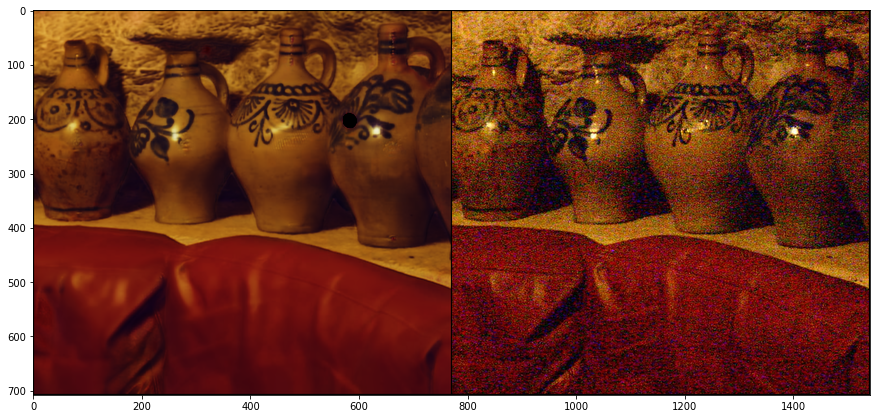

In [17]:
out_np = torch_to_np(net(net_input))
q = plot_image_grid([np.clip(out_np, 0, 1), img_noflash_np], factor=13);

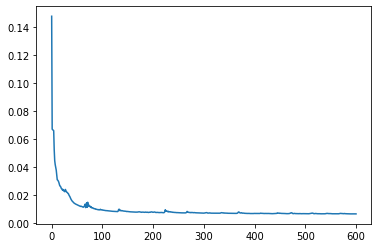

In [18]:
plt.plot(l)